### Wprowadzenie do operacji morfologicznych

#### Wstęp

Znasz już pewne metody liniowego filtrowania obrazów cyfrowych, jak np. filtry konwolucyjne, oraz niektóre metody nieliniowe, jak choćby progowanie. Inną ważną grupą metod nieliniowych są _operacje morfologiczne_, które - jak wskazuje sama nazwa (gr. _morphos_ - "kształt") - służą do modyfikacji kształtu obiektów na obrazach. Najczęściej rozpatrujemy morfologię w kontekście obrazów binarnych, gdyż operacje z tej grupy są tu najbardziej użyteczne, choć jest możliwe stosowanie operatorów morfologicznych również na innych obrazach. Na zajęciach skupimy się na obrazach binarnych.

Przekształcenia morfologiczne przypominają co do zasady filtry konwolucyjne: też są one oparte na pewnym _jądrze_, czyli masce, która przesuwana jest po całej powierzchni obrazu wejściowego, a jej zawartość decyduje o wartości wynikowej - tutaj jednak podobieństwa się kończą.

#### Podstawowe operacje morfologiczne: erozja i dylatacja

Aby wyjaśnić zasadę działania operacji morfologicznych, zacznijmy od najbardziej podstawowych z nich: erozji i dylatacji (rzadziej: _dylacji_). W obydwu przypadkach, piksel obrazu wyjściowego $Y[i,j]$ tworzymy poprzez rozpatrzenie odpowiadającego mu piksela obrazu wejściowego $X[i,j]$ wraz z pewnym jego otoczeniem opisanym przez element strukturalny $K$, a następnie wykonanie pewnej operacji na wybranych pikselach. W przypadku erozji jest to operacja $\min$, a więc wybierana jest najmniejsza wartość z objętego maską otoczenia każdego piksela. Analogicznie, dla dylatacji jest to $\max$.

Działanie operacji morfologicznych, na przykładzie erozji, wyjaśnione jest na ilustracji poniżej:

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import numpy as np

def image_grid(axes, image, title:str=''):
    h, w = image.shape
    axes.imshow(image, vmin=0, vmax=255, interpolation='none', cmap='gray')
    axes.set_xticks(np.arange(0.5, w+0.5, 1), minor=True)
    axes.set_yticks(np.arange(0.5, h+0.5, 1), minor=True)
    axes.set_xticks(np.arange(0.5, w+0.5, 5))
    axes.set_yticks(np.arange(0.5, h+0.5, 5))
    axes.set_xticklabels([])
    axes.set_yticklabels([])
    axes.set_xlim([-0.5,w-0.5])
    axes.set_ylim([-0.5,h-0.5])
    axes.grid(axis='both', which='both', alpha=0.8)
    if title:
        axes.set_title(title)

Przyjrzyjmy się działaniu erozji na przykładzie. Na lewym panelu znajduje się obraz wejściowy z wybranym fragmentem odpowiadającym pewnemu położeniu maski.

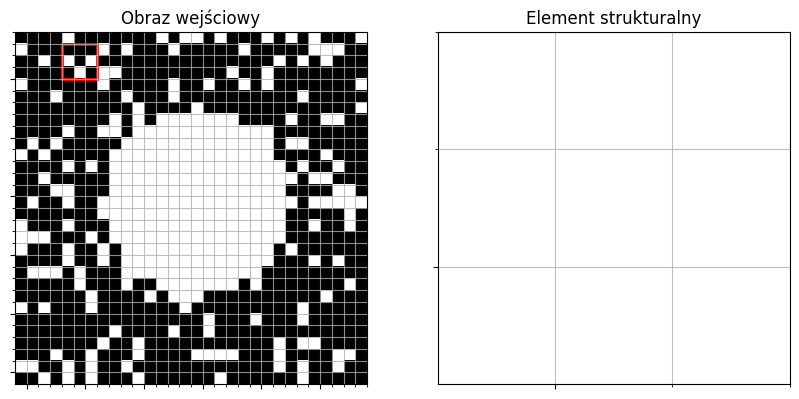

In [4]:
# stwórzmy przykładowy obraz
image = np.zeros((30, 30), dtype=np.uint8)
cv2.circle(image, (15, 15), 8, 255, -1)
np.random.seed(211)
image[np.random.rand(*image.shape) > 0.8] = 255

# prosty element strukturalny 3x3
kernel = np.ones((3, 3), dtype=np.uint8)

f, (a1, a2) = plt.subplots(1, 2)
image_grid(a1, image, 'Obraz wejściowy')
image_grid(a2, 255*kernel, 'Element strukturalny')
f.set_figwidth(10)
f.set_figheight(5)

a1.add_patch(ptc.Rectangle((3.5, 25.5), 3, 3, linewidth=2, edgecolor='red', facecolor='none'));

Erozja polega na:
1. wzięciu wartości pikseli z wybranego obszaru...
2. ...ale tylko tych, którym odpowiadają niezerowe wartości jądra (w tym przypadku wszystkie są niezerowe),
3. wykonaniu operacji $\min$ na pozostałych wartościach.

Alternatywnie (w przypadku binarnym), można erozję wyobrazić sobie jako funkcję sprawdzającą, czy w danym otoczeniu wszystkie piksele są 1. Niezależnie jak patrzeć - w tym przypadku wynikiem jest 0 (fałsz).

Oczywiście, element strukturalny nie musi zawierać samych jedynek ani też być prostokątny. Rozważmy poniższy przykład. Jaka będzie wartość piksela wynikowego?

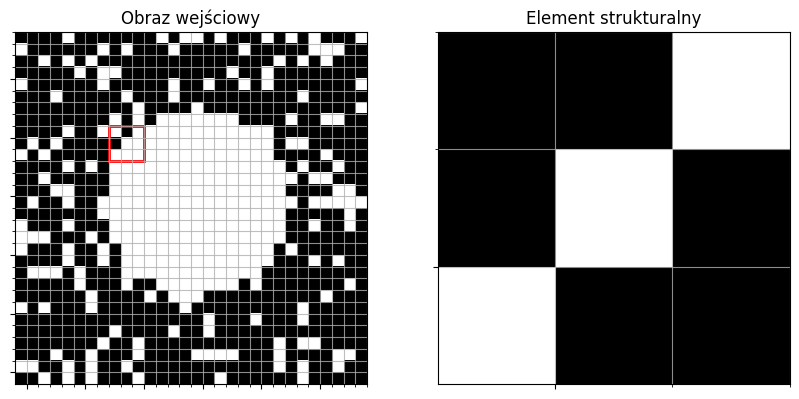

In [5]:
kernel2 = np.eye(3, dtype=np.uint8)

f, (a1, a2) = plt.subplots(1, 2)
image_grid(a1, image, 'Obraz wejściowy')
image_grid(a2, 255*kernel2, 'Element strukturalny')
f.set_figwidth(10)
f.set_figheight(5)

a1.add_patch(ptc.Rectangle((7.5, 18.5), 3, 3, linewidth=2, edgecolor='red', facecolor='none'));

<details>
    <summary><u>Pokaż odpowiedź</u></summary>
    Wynikiem jest 255, ponieważ z podanym elementem strukturalnym pokrywają się tylko piksele o wartości 255.
</details>

Zastosujmy teraz erozję na całym obrazie, korzystając z funkcji [`cv2.erode`](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb). Do funkcji podajemy:
* obraz wejściowy,
* jądro,
* liczbę iteracji - można za jednym wywołaniem powtórzyć operację dowolną liczbę razy,
* _kotwicę_ - wektor informujący o ustawieniu elementu strukturalnego względem piksela wejściowego: z reguły ustawiamy kotwicę na środku jądra, co znaczy, że pod uwagę brane będzie symetryczne otoczenie każdego piksela; możemy wprost wyliczyć tę wartość (np. dla elementu strukturalnego 3x3 będzie to wektor (1,1), dla 5x5 analogicznie (2,2) itp.), a możemy podać magiczną stałą (-1,-1), powodując że OpenCV samo wyliczy położenie jądra,
* flagę informującą o sposobie radzenia sobie z krawędziami obrazu (sprawdź dostępne wartości w [dokumentacji](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)).

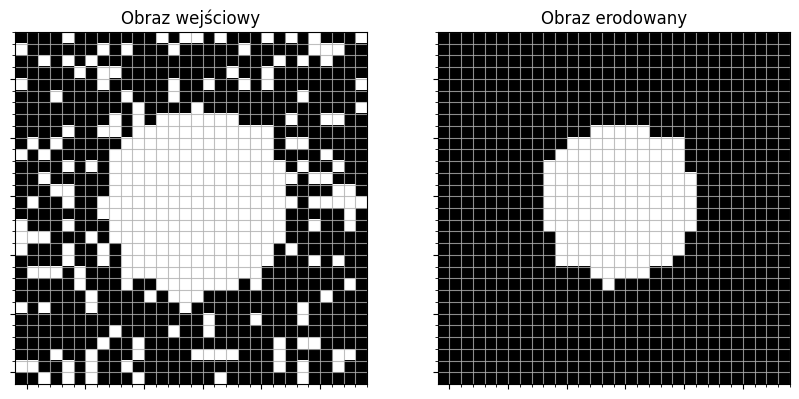

In [6]:
eroded = cv2.erode(image, kernel=kernel, anchor=(-1,-1), borderType=cv2.BORDER_REPLICATE)

f, (a1, a2) = plt.subplots(1, 2)
image_grid(a1, image, 'Obraz wejściowy')
image_grid(a2, eroded, 'Obraz erodowany')
f.set_figwidth(10)
f.set_figheight(5)

Jak widać, erozja w prosty sposób usunęła drobne artefakty rozsiane po całym obrazie - to jest główne, lecz nie jedyne zastosowanie tego narzędzia. Widać też, że powierzchnia obiektu uległa zmniejszeniu. Dlaczego?

---

Dylatacja działa w sposób analogiczny, lecz zamiast operacji $\min$ mamy $\max$, a więc można wyobrażać ją sobie jako sprawdzenie, czy w otoczeniu przetwarzanego piksela znajduje się choć jeden niezerowy.

Skutek jej działania na powyższym obrazie (wywołanie jest analogiczne, patrz [dokumentacja](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c)):

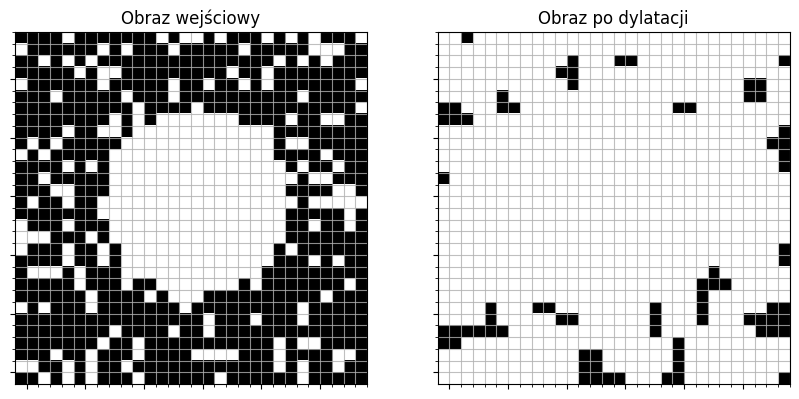

In [7]:
dilated = cv2.dilate(image, kernel=kernel, anchor=(-1,-1), borderType=cv2.BORDER_REPLICATE)

f, (a1, a2) = plt.subplots(1, 2)
image_grid(a1, image, 'Obraz wejściowy')
image_grid(a2, dilated, 'Obraz po dylatacji')
f.set_figwidth(10)
f.set_figheight(5)

Oczywiście, wszystkie zakłócenia obecne na obrazie zostały wyeksponowane.

Głównym zastosowaniem dylatacji jest jednak "łatanie dziur". Rozważmy inny obraz:

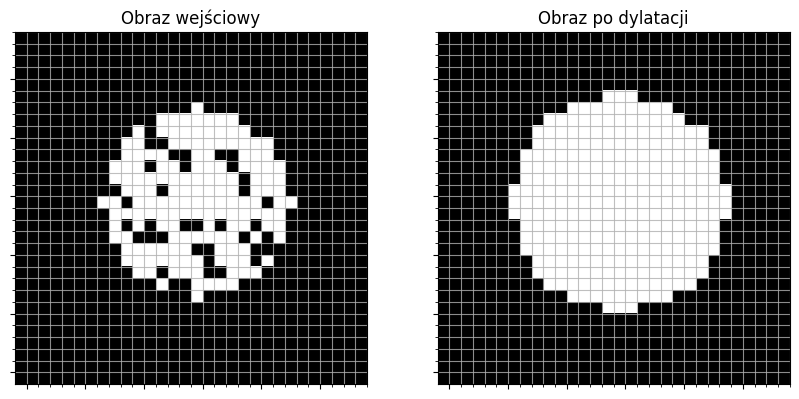

In [8]:
image2 = np.zeros((30, 30), dtype=np.uint8)
cv2.circle(image2, (15, 15), 8, 255, -1)
np.random.seed(211)
image2[np.bitwise_and(np.random.rand(*image2.shape) > 0.8, image2>0)] = 0

dilated2 = cv2.dilate(image2, kernel=kernel, anchor=(-1,-1), borderType=cv2.BORDER_REPLICATE)

f, (a1, a2) = plt.subplots(1, 2)
image_grid(a1, image2, 'Obraz wejściowy')
image_grid(a2, dilated2, 'Obraz po dylatacji')
f.set_figwidth(10)
f.set_figheight(5)

Wyraźnie widać dwa efekty. Pożądany: nieciągłości w obiekcie zostały usunięte; oraz niepożądany: powiększyła się powierzchnia obiektu. Dlaczego?

#### Operacje złożone: otwarcie i zamknięcie

Pozostańmy przy poprzednim przykładzie. W wyniku dylatacji obiekt uległ powiększeniu (co może, ale z reguły nie jest pożądane). Wiemy natomiast, że erozja powoduje pomniejszenie obiektów. Jeżeli więc naszym celem jest tylko usunięcie nieciągłości, możemy wykonać dylatację i erozję bezpośrednio po sobie, by za pomocą drugiej usunąć efekty uboczne tej pierwszej:

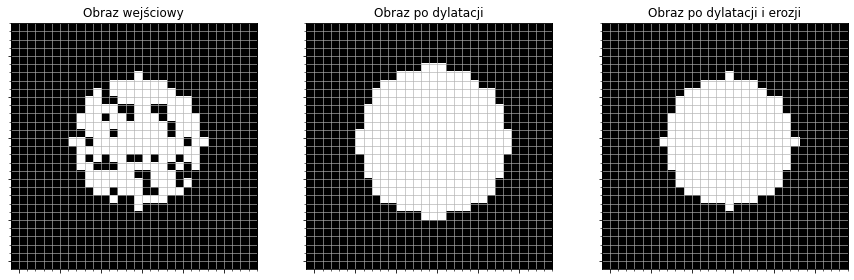

In [7]:
eroded2 = cv2.erode(dilated2, kernel=kernel, anchor=(-1,-1), borderType=cv2.BORDER_REPLICATE)

f, (a1, a2, a3) = plt.subplots(1, 3)
image_grid(a1, image2, 'Obraz wejściowy')
image_grid(a2, dilated2, 'Obraz po dylatacji')
image_grid(a3, eroded2, 'Obraz po dylatacji i erozji')
f.set_figwidth(15)
f.set_figheight(5)

Taką sekwencję operacji nazywamy _zamknięciem_ i możemy ją wykonać w OpenCV za pomocą pojedynczego wywołania ogólnej funkcji [`cv2.morphologyEx`](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f). Jej sygnatura jest podobna do znanych już `erode` i `dilate`, dodatkowym argumentem jest [typ żądanej operacji](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32). Powyższe moglibyśmy zatem zrealizować bezpośrednio:

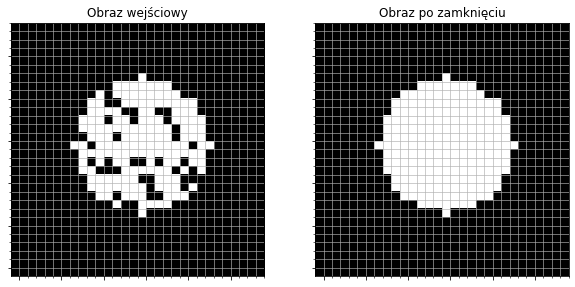

In [8]:
closed = cv2.morphologyEx(image2, op=cv2.MORPH_CLOSE, kernel=kernel, anchor=(-1,-1), borderType=cv2.BORDER_REPLICATE)

f, (a1, a2) = plt.subplots(1, 2)
image_grid(a1, image2, 'Obraz wejściowy')
image_grid(a2, closed, 'Obraz po zamknięciu')
f.set_figwidth(10)
f.set_figheight(5)

Operacją analogiczną do zamknięcia jest _otwarcie_, czyli sekwencja: erozja-dylatacja. Wróćmy do przykładu z samego początku:

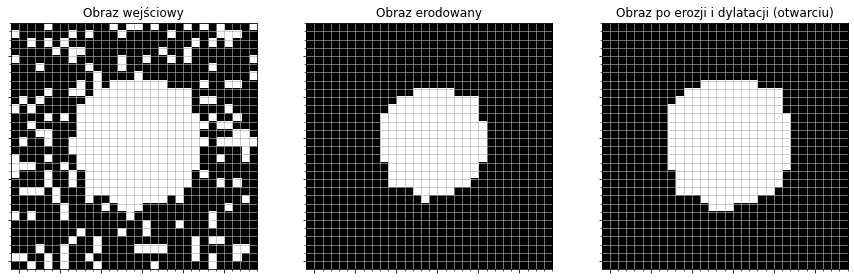

In [9]:
eroded = cv2.erode(image, kernel=kernel, anchor=(-1,-1), borderType=cv2.BORDER_REPLICATE)
opened = cv2.dilate(eroded, kernel=kernel, anchor=(-1,-1), borderType=cv2.BORDER_REPLICATE)

f, (a1, a2, a3) = plt.subplots(1, 3)
image_grid(a1, image, 'Obraz wejściowy')
image_grid(a2, eroded, 'Obraz erodowany')
image_grid(a3, opened, 'Obraz po erozji i dylatacji (otwarciu)')
f.set_figwidth(15)
f.set_figheight(5)

#### Element strukturalny

Używany w powyższych przykładach kwadratowy, pełny element strukturalny to nie jedyna słuszna opcja stosowana do filtrowania obrazów. W ogólności stosować można jądra dowolnego kształtu, a ich dobór zależy od charakteru zmian, jakie chcemy wprowadzić do obrazu. Tego tematu nie będziemy zgłębiać; zapoznaj się jednak z poniższym przykładem. Czym różni się kształt obiektu po otwarciu z różnymi jądrami? Jakie zakłócenia nie zostały usunięte? W jaki sposób zostały wzmocnione?

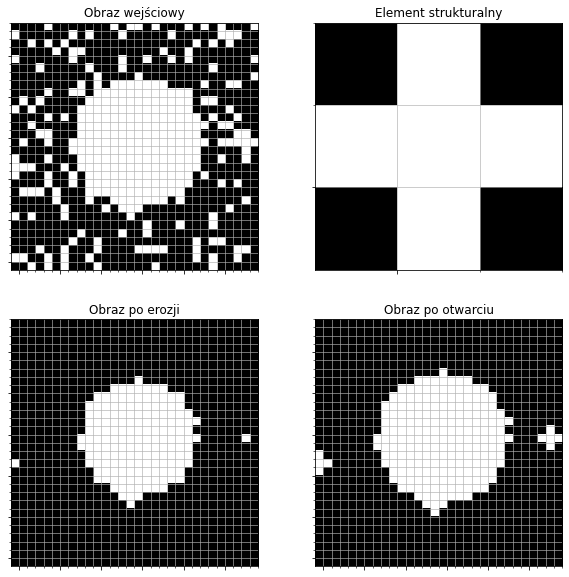

In [10]:
cross = np.zeros((3, 3), dtype=np.uint8)
cross[1, :] = 1
cross[:, 1] = 1

eroded_c = cv2.erode(image, kernel=cross, anchor=(-1,-1), borderType=cv2.BORDER_REPLICATE)
opened_c = cv2.dilate(eroded_c, kernel=cross, anchor=(-1,-1), borderType=cv2.BORDER_REPLICATE)

f, ((a1, a2), (a3, a4)) = plt.subplots(2, 2)
image_grid(a1, image, 'Obraz wejściowy')
image_grid(a2, 255*cross, 'Element strukturalny')
image_grid(a3, eroded_c, 'Obraz po erozji')
image_grid(a4, opened_c, 'Obraz po otwarciu')
f.set_figwidth(10)
f.set_figheight(10)

W powyższych przykładach jądro tworzone było manualnie. W OpenCV dostępna jest jednak funkcja [`cv2.getStructuringElement`](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc) pozwalająca na uogólnione generowanie jąder dla dowolnego rozmiaru, dla kilku predefiniowanych typów (patrz: [`cv::MorphShapes`](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gac2db39b56866583a95a5680313c314ad)).

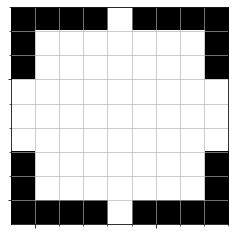

In [11]:
k_ = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))

image_grid(plt.gca(), 255*k_)